In [110]:
import pandas as pd
import numpy as np
import json
from datetime import datetime
import matplotlib as plt
from sklearn import preprocessing

## Import Data

In [56]:
# reading the JSON data using json.load()
file = 'data/CA_category_id.json'

In [57]:
with open(file) as train_file:
    dict_train = json.load(train_file)
    print(dict_train['items'][0]['snippet']['title'])

Film & Animation


In [58]:
# converting json dataset from dictionary to dataframe
df = pd.DataFrame.from_dict(dict_train, orient='index')
df.reset_index(level=0, inplace=True)

In [74]:
df = pd.read_csv("data/CAvideos.csv")
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...


In [75]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

## Data Cleaning

In [76]:
# treding_date does not have time precesion
df['trending_date'] = pd.to_datetime(df.trending_date, format='%y.%d.%m').dt.tz_localize('UTC')

In [77]:
df['publish_time'] = pd.to_datetime(df.publish_time, infer_datetime_format=True)

In [81]:
df['days_to_trend'] = ((df['trending_date'].dt.date - df['publish_time'].dt.date)/np.timedelta64(1,'D')) + 1

In [97]:
df.sort_values('days_to_trend', ascending=True).head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,days_to_trend
12928,vGTMKKFjqdw,2018-01-19 00:00:00+00:00,CNN LIVE STREAM,CNN Live,22,2018-01-19 00:01:20+00:00,[none],55481,138,65,16,https://i.ytimg.com/vi/vGTMKKFjqdw/default.jpg,False,False,False,cnn live NEWS,1.0
33295,WPbuYEFGyC4,2018-05-07 00:00:00+00:00,Dimanche Tout Est Permis S01 Episode 33 06-05-...,Elhiwar Ettounsi,24,2018-05-07 00:07:19+00:00,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",26224,218,44,38,https://i.ytimg.com/vi/WPbuYEFGyC4/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...,1.0


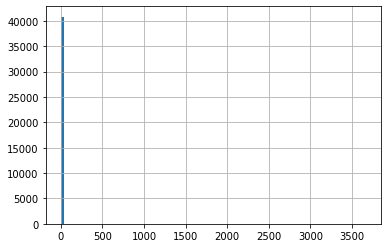

In [92]:
df['days_to_trend'].hist(bins=100);

In [96]:
df.days_to_trend.describe()

count    40881.000000
mean         4.481495
std         59.735969
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max       3659.000000
Name: days_to_trend, dtype: float64

In [109]:
df[df.days_to_trend > 2000]["title"].count()

9

## Normalization

In [113]:
x = df[['views', 'days_to_trend']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)


In [114]:
df.head()

,0,1
0,0.124474,0.001093
1,0.007356,0.000273
2,0.023147,0.000547
3,0.015199,0.000547
4,0.243197,0.001367
